Can we make change on the images, like denoise them or make them more vague, by the Autoencoders?

We want to teach the machine that save important features of the data and remove the remained!

When the input is large and it get smaller and smaller for every layer we would reduce the dimentions and keep the most important features of the data

In this code we want just get an image, reduce it dimentions with the encoder and reproduce it again with the decoder!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

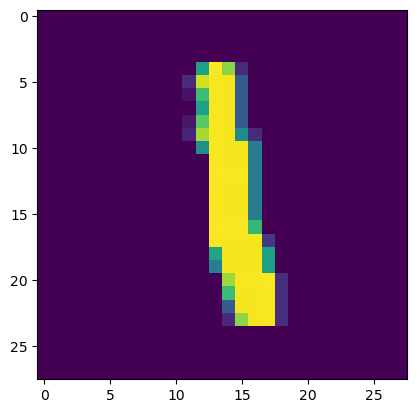

In [7]:
plt.imshow(X_train[6])

Let's rescale the data!

In [8]:
X_train=X_train/255

In [9]:
X_test=X_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

Note:Here we are going to reduce the dimention of the image and then reproduce it again.

Each image is 28*28 


In [15]:
X_train[0].shape

(28, 28)

In [12]:
28*28

784

In [13]:
784/2

392.0

In [16]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
#we would slowly decrease the dimention
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Note:Using the ReLU (Rectified Linear Unit) activation function has become a standard practice in deep learning models, including the encoder part of autoencoders, for several reasons:

Avoiding the Vanishing Gradient Problem: Activation functions like the sigmoid or tanh can suffer from the vanishing gradient problem, where gradients become very small, causing slow learning or even stopping the learning in deep layers. ReLU does not have this problem because its gradient is either 0 or 1.

Sparsity: ReLU can output zero for any input less than zero, leading to sparse representations, which can be beneficial in reducing the computational complexity and improving the model's generalization.

Efficient Computation: ReLU is computationally efficient because it involves simple thresholding at zero. This efficiency speeds up the training process.

Empirical Performance: ReLU has shown excellent empirical performance in various deep learning tasks. Many practical experiments and research have demonstrated that networks using ReLU converge faster and often achieve better performance compared to those using other activation functions.

Other activation functions like sigmoid, tanh, or leaky ReLU can be used, and each has its own advantages and disadvantages:

Sigmoid: Good for binary classification, but suffers from vanishing gradients and outputs in the range [0, 1].
Tanh: Outputs in the range [-1, 1], which can help center the data but still suffers from the vanishing gradient problem.
Leaky ReLU: Similar to ReLU but allows a small gradient when the unit is not active, which can mitigate the problem of "dying ReLUs" where neurons can sometimes get stuck in the inactive state.
In practice, ReLU is chosen for its simplicity, effectiveness, and faster convergence, making it a popular choice in deep learning models.

In [18]:
decoder=Sequential()
#note: decoder neurons are the reverse of the enocder until you reach the first amount!
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [19]:
autoencoder=Sequential([encoder,decoder])

In [23]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.7), metrics=['accuracy'])

In machine learning, a loss function is used to measure how well the model's predictions match the actual data. It quantifies the difference between the predicted output and the true output, guiding the optimization process to adjust the model's weights and minimize this difference.

What is loss='binary_crossentropy'?
binary_crossentropy is a specific type of loss function used primarily for binary classification tasks or cases where the output can be interpreted as probabilities.

Simplified Explanation with Examples
Example 1: Binary Classification
Imagine you have a simple problem where you need to classify whether an email is spam (1) or not spam (0).

True labels (actual data): [0, 1, 0, 1, 0]
Predicted probabilities (from the model): [0.1, 0.9, 0.2, 0.8, 0.3]
For each email, binary_crossentropy will calculate a loss value based on how far the predicted probability is from the actual label (0 or 1). If the true label is 1 and the predicted probability is close to 1, the loss is low. If the true label is 0 and the predicted probability is close to 0, the loss is also low.

The formula for binary cross-entropy is:
binary_crossentropy
=
−
1
𝑁
∑
𝑖
=
1
𝑁
[
𝑦
𝑖
log
⁡
(
𝑝
𝑖
)
+
(
1
−
𝑦
𝑖
)
log
⁡
(
1
−
𝑝
𝑖
)
]
binary_crossentropy=− 
N
1
​
 ∑ 
i=1
N
​
 [y 
i
​
 log(p 
i
​
 )+(1−y 
i
​
 )log(1−p 
i
​
 )]

Where:

𝑦
𝑖
y 
i
​
  is the true label (0 or 1)
𝑝
𝑖
p 
i
​
  is the predicted probability
𝑁
N is the number of samples
Example 2: Autoencoder for Image Reconstruction
Let's consider an autoencoder like in your code, which is used for reconstructing images. The input images are in grayscale (values between 0 and 1).

Input image: A 28x28 grayscale image.
Output image: The reconstructed 28x28 grayscale image from the autoencoder.
The autoencoder's goal is to minimize the difference between the input and the reconstructed image. Here, each pixel can be treated as a binary value (either closer to 0 or 1), and we can use binary_crossentropy to measure how well the model reconstructs the image.

Why Use binary_crossentropy?
Probabilistic Interpretation: When your output values are probabilities (like in classification tasks or autoencoders outputting normalized pixel values), binary_crossentropy is appropriate because it directly measures the difference between predicted probabilities and the actual labels.

Effective for Binary Outputs: If your task involves binary outcomes (like pixel values in an image being on or off), binary_crossentropy is suitable.

Good Performance: In practice, binary_crossentropy often leads to better performance and faster convergence for models dealing with binary or probabilistic outputs.

Why Not Other Loss Functions?
Mean Squared Error (MSE):

Example: Let's say your true label is 0 and the predicted probability is 0.01.
MSE
=
(
0
−
0.01
)
2
=
0.0001
MSE=(0−0.01) 
2
 =0.0001
Limitation: While this value is small, MSE treats all errors equally and doesn't account for the probabilistic nature of the problem. It might not penalize large errors appropriately in probabilistic contexts.
Categorical Crossentropy:

Example: Used for multi-class classification tasks where there are more than two classes.
Limitation: For binary or probability-based outputs, it would be unnecessarily complex and not optimized for binary outcomes.

In [24]:
autoencoder.fit(X_train,X_train, epochs=9, validation_data=[X_test, X_test])
#note: for instance inout is X_train[0] and the output is also X_train [0] thus the model can be trained!

Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0642 - loss: 0.3158 - val_accuracy: 0.0941 - val_loss: 0.2381
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1023 - loss: 0.2333 - val_accuracy: 0.1554 - val_loss: 0.1999
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1492 - loss: 0.1945 - val_accuracy: 0.1834 - val_loss: 0.1698
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1844 - loss: 0.1671 - val_accuracy: 0.1938 - val_loss: 0.1553
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2024 - loss: 0.1541 - val_accuracy: 0.2021 - val_loss: 0.1478
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2124 - loss: 0.1483 - val_accuracy: 0.2171 - val_loss: 0.1459
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2194 - loss: 0.1429 - val_accuracy: 0.2190 - val_loss: 0.1422
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2276 - loss: 0.1376 - val_accu

In [25]:
passed_images=autoencoder.predict(X_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


original_image


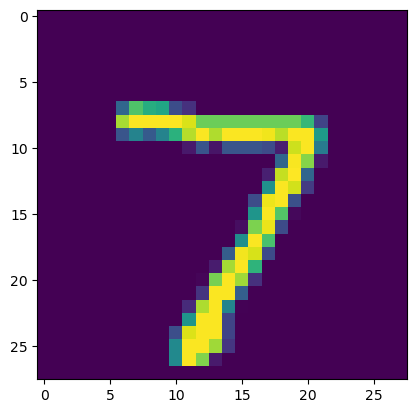

Attempted_reconstruction_of_the_Image


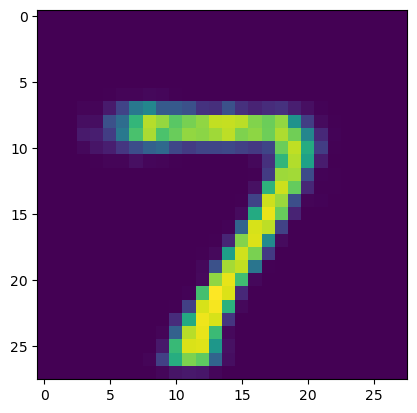

In [26]:
n=0
print("original_image")
plt.imshow(X_test[n])
plt.show()
print("Attempted_reconstruction_of_the_Image")
plt.imshow(passed_images[n])